Imports

In [74]:
import nibabel as nib
from nilearn import plotting, image
from nilearn.image import mean_img, index_img
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

Declare Path

In [76]:
nii_file_path = './sub-BA3550/func/sub-BA3550_task-beads_run-1_bold.nii.gz'
fMRI_data = image.load_img(nii_file_path)

print(nii_file_path)

./sub-BA3550/func/sub-BA3550_task-beads_run-1_bold.nii.gz


Shape of the nifti image

In [59]:
import nibabel as nib
nifti_img = nib.load(nii_file_path)
dimensions = nifti_img.header.get_data_shape()
print(dimensions)

(98, 98, 72, 400)


Visualization of extraction of 1 3D EPI image from 4D image

c:\Users\Phili\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



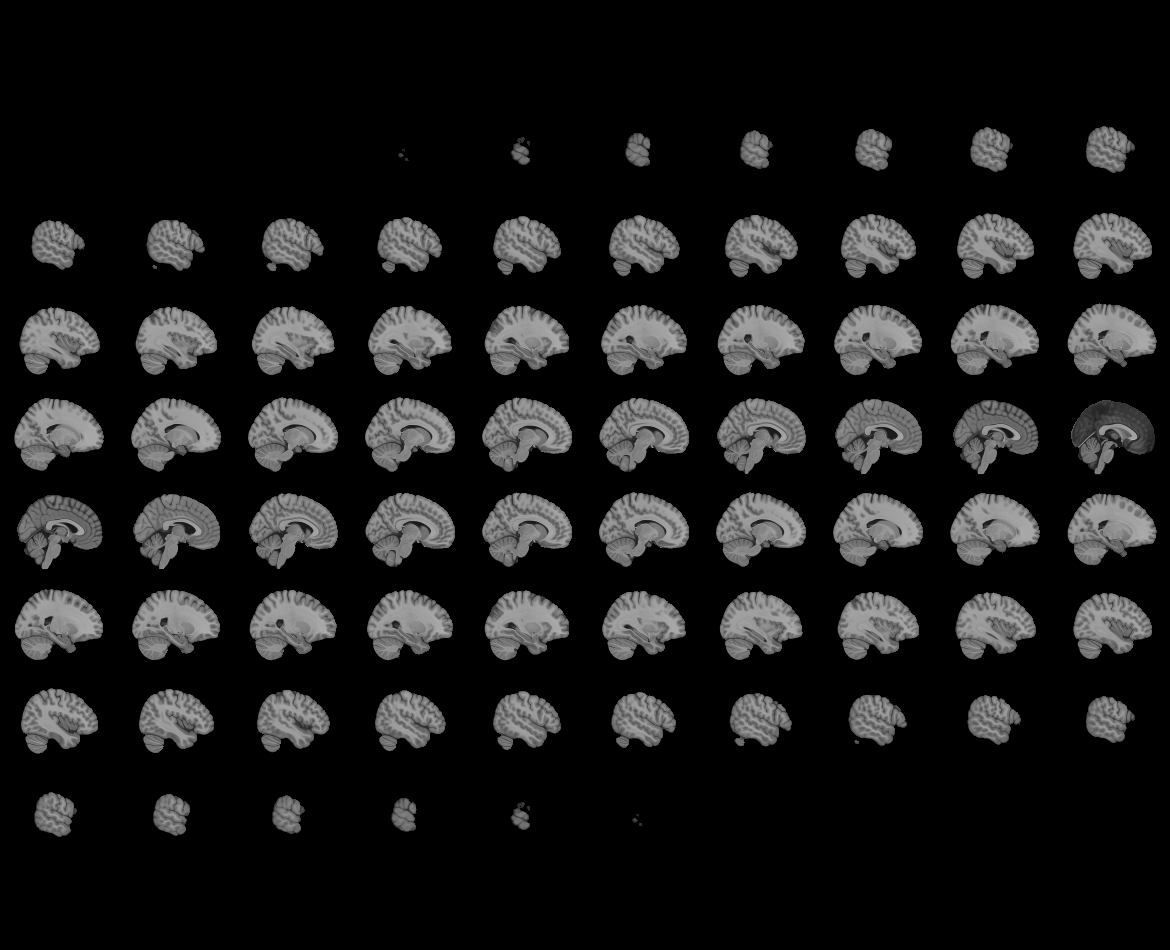
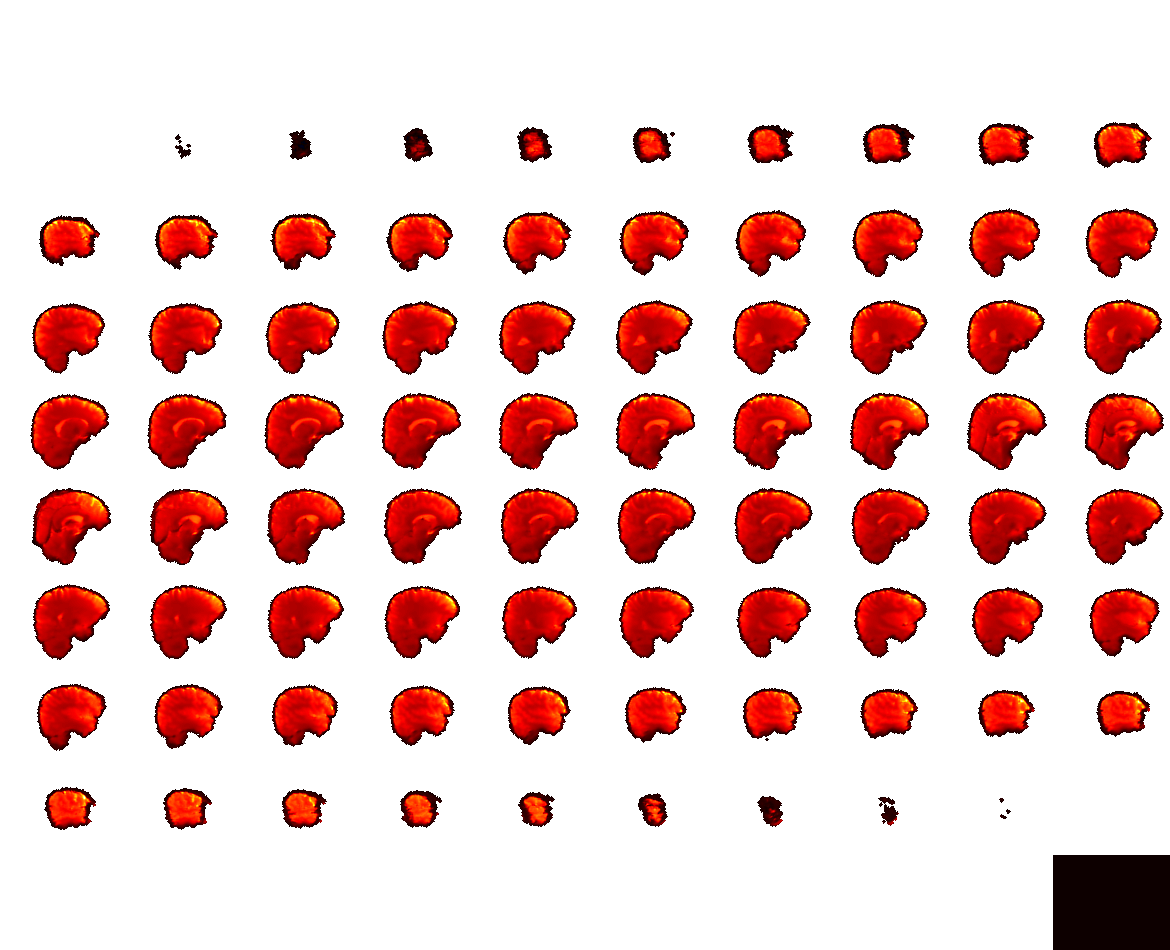

In [25]:
plotting.view_img(mean_img(nii_file_path), threshold=10)

Load and print behavioral data

In [60]:
behav_path = './sub-BA3550/func/sub-BA3550_task-beads_run-1_events.tsv'
behavioral = pd.read_csv(behav_path, delimiter='\t')
print(behavioral)

          onset  duration               event_type  num_beads_high  \
0      1.822896  3.065544            initial_beads            14.0   
1      4.958621  1.381369               extra_bead             NaN   
2      6.896906  0.000000  additional_draw_allowed            15.0   
3      8.002955  0.000000           terminate_draw            15.0   
4      8.455547  0.000000                      bet            15.0   
..          ...       ...                      ...             ...   
236  592.977310  3.047147            initial_beads            14.0   
237  598.067641  1.159699               extra_bead             NaN   
238  600.279469  0.000000  additional_draw_allowed            14.0   
239  600.901776  0.000000           terminate_draw            14.0   
240  601.268564  0.000000                      bet            14.0   

     num_beads_low  points_high bead_type bet_jar_type button  initialVOI  \
0              6.0          170       NaN          NaN    NaN    -1.81705   
1    

Seperate onsets from rest of the behavioral data

In [71]:
onset_column = behavioral['onset']	
other_columns = behavioral.drop('onset', axis=1)

Calculate volume indices corresponding to behavioral event onsets

In [72]:
TR = 1.5
volume_indices = (onset_column / TR).astype(int)

Extract the volumes corresponding to the mapped indices from the fMRI data

In [77]:
mapped_volumes = image.index_img(fMRI_data, volume_indices)

IndexError: index 400 is out of bounds for axis 3 with size 400

Hypothesis: Can we distinguish expected high reward trials from expected low reward trials from pattern decoding of the ventral striatum?

Behavioral variables needed:
- gameindices: whether the trial is in the baseline block (1) or the scale block (2).
- rew_corr_H: reward for a correct bet on the high-reward jar, either 70 or 170 in the baseline block and 70 or 7 in the scale block. randomized across trials.
- rew_corr_L: reward for a correct bet on the low-reward jar, either 10 or 110 in the baseline block and 10 or 1 in the scale block. (Redundant with rew_corr_H.)
- rew_incorr: reward for an incorrect bet, either 0 or 100 in the baseline block; always 0 in the scale block. (Redundant with rew_corr_H.)
- choice: whether the participant bet on the high-reward jar (1) or low-reward jar (2).

Trying to predict the amount of reward in trials where PP choose the high reward jar (choice == !) from the ventral striatum, irrespective of block type.
-> Compare reward 170 vs. 70 vs. 7 

Define conditions

In [37]:
conditions = behavioral['rew_corr_H']
print(conditions)

0      170
1      170
2      170
3      170
4       70
      ... 
241     70
242      7
243      7
244      7
245      7
Name: rew_corr_H, Length: 246, dtype: int64


Only select trials where PP chose the high reward jar, create a mask of these trials which is then applied to the fmri data.

In [35]:
condition_mask = conditions.isin([1])

Index_img to split 4D image into 3D images

In [38]:
fmri_niimgs = index_img(nii_file_path, condition_mask)

IndexError: boolean index did not match indexed array along dimension 3; dimension is 400 but corresponding boolean dimension is 246